In [ ]:
### Steps for Regression Analysis

#### **1. Split the Dataset**
- Split the data into **training (70%)** and **testing (30%)** subsets.
- Use the `train_test_split` function to ensure randomness in the split.
- Define:
  - **Features (X)**: `X1 transaction date`, `X2 house age`, `X3 distance to the nearest MRT station`, `X4 number of convenience stores`.
  - **Target (Y)**: `Y house price of unit area`.

#### **2. Check Correlation**
- Compute the correlation matrix to understand the relationships between features and the target variable.
- Visualize the correlation matrix using a **heatmap**:
  - Strong correlations between features and the target suggest potential predictors.
  - Identify multicollinearity (strong correlations between features), which might affect regression models.

#### **3. Apply Regression Models**

**a. Linear Regression**
1. Train a **Linear Regression** model using the training data.
2. Predict the target values using the testing data.

**b. Polynomial Regression**
1. Use `PolynomialFeatures` to generate polynomial terms for the features (e.g., degree = 2 or 3).
2. Train a **Linear Regression** model on the transformed polynomial features.
3. Predict the target values using the transformed testing data.

#### **4. Evaluate Model Performance**
- Evaluate both Linear and Polynomial Regression models using:
  1. **Mean Squared Error (MSE)**:
     - Measures the average squared difference between predicted and actual values.
     - Lower MSE indicates better performance.
  2. **R-squared (R²)**:
     - Measures how well the model explains the variability of the target variable.
     - Higher R² indicates better performance.
- Compare the results to determine which model performs better.

#### **5. Visualize Results**
- Plot **actual vs. predicted values** for both Linear and Polynomial Regression.
- For Polynomial Regression, visualize the curve fitting to see how well it models the data.


In [71]:
import numpy as np 
import pandas as pd 
df = pd.read_csv("C:\\Users\\User\\Downloads\\Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [73]:
df = df.drop(['No','X5 latitude','X6 longitude'],axis = 1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [75]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [77]:
from sklearn.model_selection import train_test_split as tts 
X = df[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']]
Y = df[['Y house price of unit area']]
xtrain,xtest,ytrain,ytest = tts(X,Y,test_size = 0.3,random_state = 34)
xtrain.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
132,2013,26.6,482.7581,5
91,2013,9.1,1402.0160,0
379,2013,0.0,292.9978,6
20,2013,4.5,2275.8770,3
69,2012,12.5,561.9845,5


In [79]:
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X1 transaction date,1.000000,0.049171,0.016519,-0.005586,0.081545
X2 house age,0.049171,1.000000,0.025622,0.049593,-0.210567
X3 distance to the nearest MRT station,0.016519,0.025622,1.000000,-0.602519,-0.673613
X4 number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.571005
Y house price of unit area,0.081545,-0.210567,-0.673613,0.571005,1.000000


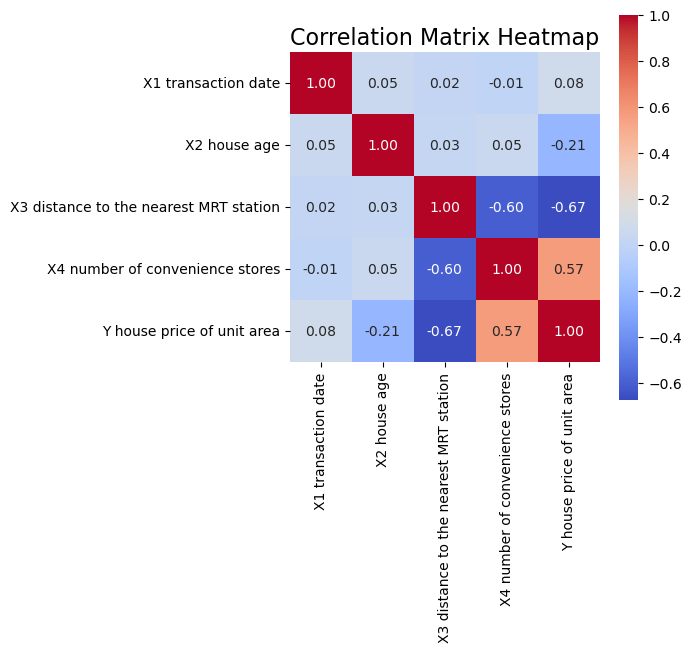

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt 
correlation_matrix = df.corr()
plt.figure(figsize = (5,5))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.2f',square = True)
plt.title("Correlation Matrix Heatmap",fontsize = 16)
plt.show()

In [83]:
#Linear Regression 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)
y_test_pred= reg.predict(xtest)
y_test_pred

array([[52.46633127],
       [37.20396103],
       [40.42886163],
       [27.50333798],
       [44.58360334],
       [45.67480908],
       [35.22001586],
       [48.07787681],
       [35.25588335],
       [44.48117952],
       [12.96074821],
       [35.28180381],
       [45.86253873],
       [28.26755038],
       [41.30340166],
       [13.75128025],
       [38.21092179],
       [39.86468063],
       [40.59159316],
       [44.28209422],
       [35.61320742],
       [43.35441645],
       [ 1.38840615],
       [38.37527563],
       [45.70387432],
       [39.6750579 ],
       [22.62369559],
       [44.99361093],
       [46.0958429 ],
       [29.13400461],
       [43.25347219],
       [45.49252027],
       [36.02710222],
       [44.47645174],
       [17.36806714],
       [37.67003999],
       [43.47262587],
       [13.86403244],
       [13.76478125],
       [30.05651797],
       [31.26627032],
       [41.88945142],
       [31.18098211],
       [43.48838526],
       [44.42461082],
       [42

In [95]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(X)
pd.DataFrame(x_poly).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,2012.0,32.0,84.87882,10.0,4048144.0,64384.0,1.707762e+05,20120.0,1024.00,2716.12224,320.0,7204.414085,848.7882,100.0
1,1.0,2012.0,19.5,306.59470,9.0,4048144.0,39234.0,6.168685e+05,18108.0,380.25,5978.59665,175.5,94000.310068,2759.3523,81.0
2,1.0,2013.0,13.3,561.98450,5.0,4052169.0,26772.9,1.131275e+06,10065.0,176.89,7474.39385,66.5,315826.578240,2809.9225,25.0
3,1.0,2013.0,13.3,561.98450,5.0,4052169.0,26772.9,1.131275e+06,10065.0,176.89,7474.39385,66.5,315826.578240,2809.9225,25.0
4,1.0,2012.0,5.0,390.56840,5.0,4048144.0,10060.0,7.858236e+05,10060.0,25.00,1952.84200,25.0,152543.675079,1952.8420,25.0


In [101]:
x_train,x_test,y_train,y_test = tts(x_poly,Y,test_size = 0.3,random_state = 23)
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,2013.0,16.2,289.3248,5.0,4052169.0,32610.6,5.824108e+05,10065.0,262.44,4687.06176,81.0,83708.839895,1446.6240,25.0
1,1.0,2012.0,2.1,451.2438,5.0,4048144.0,4225.2,9.079025e+05,10060.0,4.41,947.61198,10.5,203620.967038,2256.2190,25.0
2,1.0,2013.0,12.8,732.8528,0.0,4052169.0,25766.4,1.475233e+06,0.0,163.84,9380.51584,0.0,537073.226468,0.0000,0.0
3,1.0,2013.0,11.6,390.5684,5.0,4052169.0,23350.8,7.862142e+05,10065.0,134.56,4530.59344,58.0,152543.675079,1952.8420,25.0
4,1.0,2013.0,0.0,292.9978,6.0,4052169.0,0.0,5.898046e+05,12078.0,0.00,0.00000,0.0,85847.710805,1757.9868,36.0


In [109]:
reg.fit(x_train,y_train)
predicted_val = reg.predict(x_test)
predicted_val

array([[24.74369707],
       [34.29022817],
       [17.83555859],
       [43.22714554],
       [46.20269814],
       [39.05653203],
       [44.03107801],
       [49.70447119],
       [16.69785397],
       [41.78983479],
       [31.43483469],
       [48.81875404],
       [47.61019531],
       [52.80970992],
       [39.94031609],
       [36.20736771],
       [34.81363728],
       [34.2254918 ],
       [24.8739351 ],
       [29.18882282],
       [49.86206429],
       [35.1049421 ],
       [17.53013888],
       [17.62061555],
       [53.95156483],
       [48.83979133],
       [40.13974643],
       [46.88223743],
       [38.61631303],
       [58.37864321],
       [18.50029508],
       [30.3616858 ],
       [44.75307545],
       [37.85511091],
       [39.70013832],
       [43.23645649],
       [58.72082808],
       [46.72224246],
       [57.21692724],
       [36.33535144],
       [50.63099402],
       [40.18267934],
       [45.9483679 ],
       [38.44210175],
       [42.33443436],
       [41

In [131]:
#Evaluate model Performance 
reg.fit(xtrain,ytrain)
y_pred_= reg.predict(xtest)
reg.fit(x_train,y_train)
Y_pred_ = reg.predict(x_test)
n = xtrain.shape[0]
MSE1 =((ytest - y_pred_)**2).sum()/n
MSE2 = ((y_test - Y_pred_)**2).sum()/n
print(f"MSE1 : {MSE1},MSE2 : {MSE2}")

MSE1 : Y house price of unit area    27.0208
dtype: float64,MSE2:Y house price of unit area    23.365824
dtype: float64


In [137]:
from sklearn.metrics import r2_score
a = r2_score(ytest,y_pred_)
b = r2_score(y_test,Y_pred_)
print("The values of R2- square:")
print(a,b)

The values of R2- square:
0.6163477543589431 0.6025637011643428


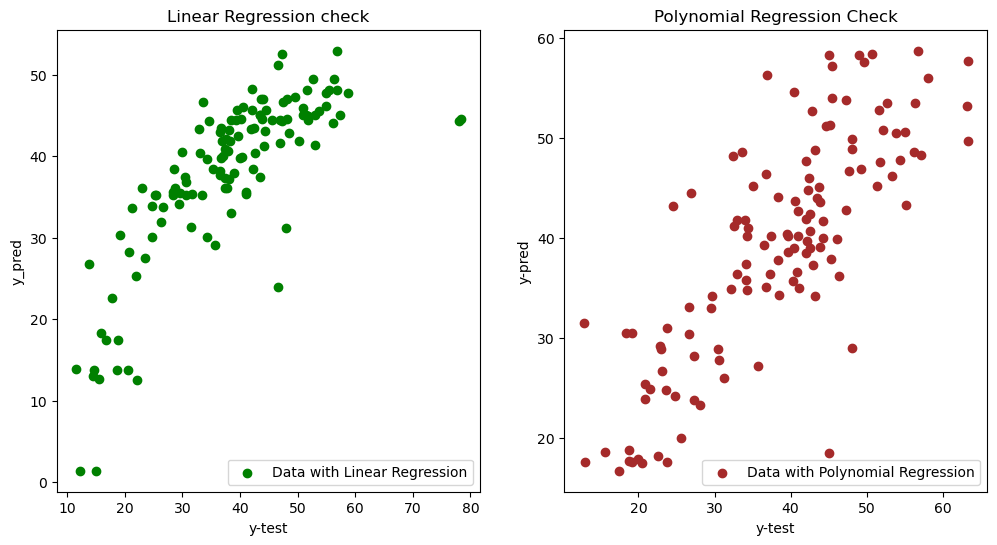

In [155]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.scatter(ytest,y_pred_,color = 'green',label = "Data with Linear Regression")
plt.xlabel("y-test")
plt.ylabel("y_pred")
plt.title("Linear Regression check")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test,Y_pred_,color = 'brown',label = "Data with Polynomial Regression")
plt.xlabel("y-test")
plt.ylabel("y-pred")
plt.title('Polynomial Regression Check')
plt.legend()
plt.show()